## This notebook is used to test weighted tensor SVD
Input data weighting has been applied in weighted_tensor function following Jones et al., J. Chemometrics 22, 482, 2008

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from tensor_svd_denoise import scree_plots, tensor_svd_denoise, weighted_tensor
import time

In [11]:
# Load noisy data and noiseless truth
path = 'D:/2020/TensorSVD/ManuscriptRelated/SimulationData/DenoiseInput_cropped/SiDislocation/'
data_noisy = sio.loadmat(path + 'Simulation_noisy_SiDisl_slice_5_10000FPS_cropped_100layers.mat')
data_noisy = data_noisy['datacube'].astype('float')
data_truth = np.load(path + 'Simulation_truth_SiDisl_slice_5_10000FPS_cropped_100layers.npy')

In [22]:
# weight the input noisy data by calling the weighted_tensor function
# Input: noisy tensor
# Output: weighted noisy tensor, weight tensor
data_noisy_weighted, weights = weighted_tensor(data_noisy)

In [ ]:
# Plot real space slice and reciprocal space slice from noisy data and ground truth
fig = plt.figure(figsize=(25,10))

plt.subplot(241)
plt.imshow(data_truth[:,:,10])
plt.title('Ground Truth',fontsize = 16)
plt.ylabel('Real Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
plt.imshow(data_noisy[:,:,10])
plt.title('Noisy Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
plt.imshow(data_noisy_weighted[:,:,10])
plt.title('Weighted Noisy Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
plt.imshow(weights[:,:,10])
plt.title('Weights',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(245)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.ylabel('Reciprocal Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
plt.imshow(data_noisy[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
plt.imshow(data_noisy_weighted[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(248)
plt.imshow(weights[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.show()

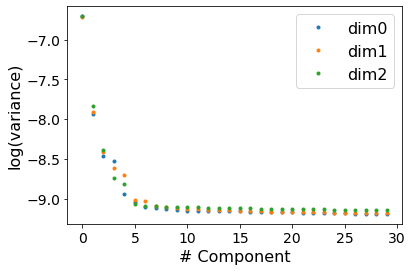

In [61]:
# Define the number of components that will be returned from scree_plots function, if ndim is not defined, ncomponents along
# each dimension will be set to the full size of that dimension
ndim = [100,100,100]
scree = scree_plots(data_noisy_weighted,ndim)

# Plot the first 30 components along each dimension in log scale

for i in range(len(scree)):
    plt.plot(np.log(scree[i][0:30]),'.',linewidth = 4, label = 'dim' + str(i))
plt.legend(fontsize=16)
plt.xlabel('# Component', fontsize=16)
plt.ylabel('log(variance)',fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [15]:
# Call tensor SVD using pre-determined ranks and a timer
rank = [15,15,8]
rank = [6,6,6]
# Unweighting the tensor SVD denoised data.
data_denoised_weighted = tensor_svd_denoise(data_noisy_weighted, rank)
data_denoised_weighted = np.multiply(data_denoised_weighted, 1/weights)
data_denoised = tensor_svd_denoise(data_noisy, rank)
print('SVD finished.')

SVD finished.


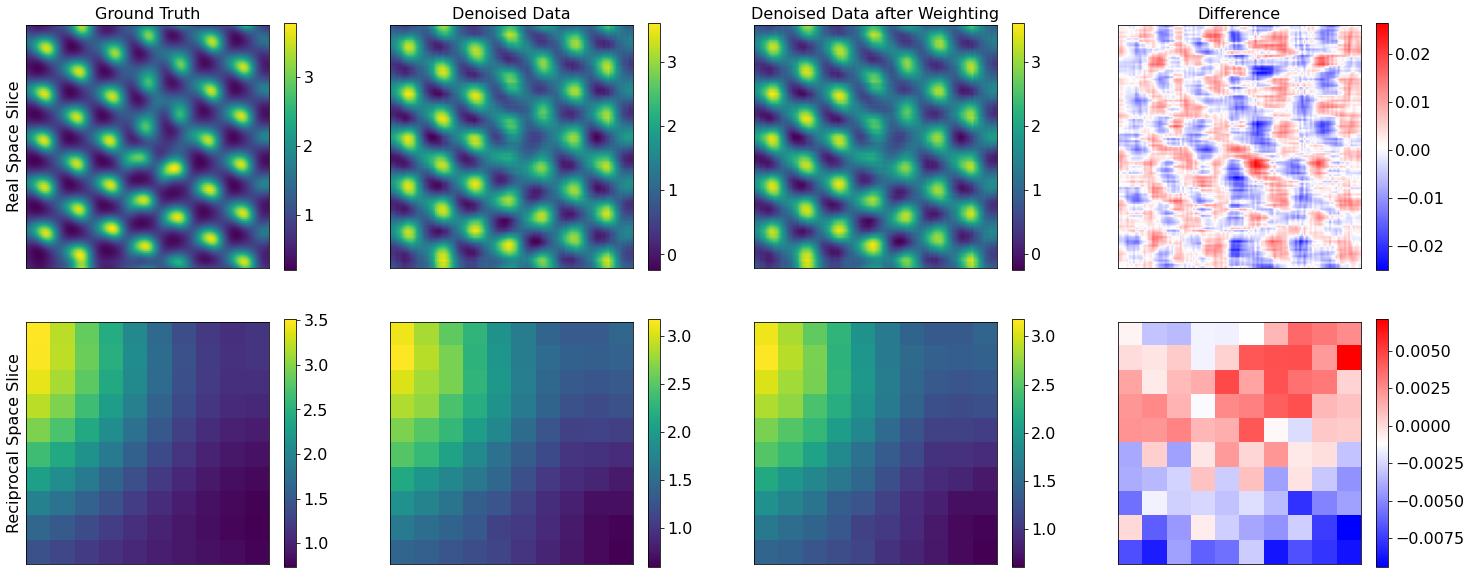

In [42]:
# Plot real space slice and reciprocal space slice from noisy data and ground truth
fig = plt.figure(figsize=(25,10))

plt.subplot(241)
plt.imshow(data_truth[:,:,10])
plt.title('Ground Truth',fontsize = 16)
plt.ylabel('Real Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(242)
plt.imshow(data_denoised[:,:,10])
plt.title('Denoised Data',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(243)
plt.imshow(data_denoised_weighted[:,:,10])
plt.title('Denoised Data after Weighting',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(244)
plt.imshow(data_denoised[:,:,10] - data_denoised_weighted[:,:,10], cmap='bwr')
plt.title('Difference',fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(245)
plt.imshow(data_truth[10,10,:].reshape(10,10))
plt.ylabel('Reciprocal Space Slice', fontsize = 16)
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(246)
plt.imshow(data_denoised[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(247)
plt.imshow(data_denoised_weighted[10,10,:].reshape(10,10))
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.subplot(248)
plt.imshow(data_denoised[10,10,:].reshape(10,10) - data_denoised_weighted[10,10,:].reshape(10,10), cmap='bwr')
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=16)
plt.xticks([])
plt.yticks([])

plt.show()

## Conclusion on atomic resolution 4D STEM data
1. For atomic resolution 4D STEM data, the weighting option does not change the final result much.
2. Possible reason: the weighting scheme using the product of mean value along each dimension does not work well for this specific data set.
3. Maybe use iterative method to generate weight tensor?